<a href="https://colab.research.google.com/github/ericakitano/Project-2-Stroke-Prediction-/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Libraries**

In [1]:
#Import Libraries
import pandas as pd

# **2. Load Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Load Data
filename1 = '/content/drive/MyDrive/Colab Notebooks/Raw Data Files/Project/Project2/healthcare-dataset-stroke-data.csv'
df1 = pd.read_csv (filename1)
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


***


# **3. Inspect & Clean the Data**

In [4]:
df1.shape

(5110, 12)

There are 5110 rows and 12 columns in this dataset.

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## **3.1 Check for Duplicates**

In [6]:
df1.duplicated().sum()

0

There are no duplicates in this dataset.

## **3.2 Check for Missing Values**

In [7]:
df1.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are **201 missing values** in the column: **`bmi`**.

In [8]:
#Check the % of missing values for each column.
df1.isna().sum() / df1.shape[0]

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

The rows that are missing values in the `bmi` column is 3.9% which is less than 5% of the overall data, therefore, we can drop these rows.

In [9]:
#Drop rows with missing values
df1.dropna(inplace=True)

In [10]:
#Check to make sure there are no more missing values
df1.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

There are no more missing values in this dataset.

## **3.3 Check for Unnecessary Columns**

In [11]:
#Display the number of rows and columns
df1.shape

(4909, 12)

The dataset currently consists of 4909 rows and 12 columns.

In [12]:
#Check if there are any columns where all data have the same or different values, 
#because such columns are usually not useful in modeling.
df1.nunique()

id                   4909
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

I will drop the `id` column from the dataset as every value in this column is unique and it does not provide any useful information for predicting the target.

In [13]:
df1 = df1.drop(columns = 'id')

In [14]:
#Confirm that the column: 'id' has been dropped.
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


## **3.4 Check for Inconsistent Values**

Check for inconsistent values of **categorical columns**: `gender`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`, `stroke`

**Column: `gender`**

In [15]:
#Column: gender
df1['gender'].value_counts() 

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

There are no inconsistent values in this column.

**Column: `ever_married`**

In [16]:
#Column: ever_married
df1['ever_married'].value_counts() 

Yes    3204
No     1705
Name: ever_married, dtype: int64

There are no inconsistent values in this column.

**Column: `work_type`**

In [17]:
#Column: work_type
df1['work_type'].value_counts() 

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

There are no inconsistent values in this column.

**Column: `Residence_type`**

In [18]:
#Column: Residence_type
df1['Residence_type'].value_counts()

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

There are no inconsistent values in this column.

**Column: `smoking_status`**

In [19]:
#Column: smoking_status
df1['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

There are no inconsistent values in this column.

**Column: `stroke`**

In [20]:
#Column: stroke
df1['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

There are no inconsistent values in this column.

This is our target column.

The classes are unbalanced.

## **3.5 Check for Odd Values**

Check for any odd values in the **numerical** columns: `age`, `hypertension`, `heart_disease`, `avg_glucose_level`, `bmi`

In [21]:
df1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- There are no odd values in this dataset.
- From this data, we can see that the columns: `hypertension`, `heart_disease`, and `stroke` (target) only have two values 0 and 1, which means that these columns are categorical as opposed to continuous numerical.

Note: The dtype of the column: `Age` is `float` and minimum age is 0.08 and not a whole number.

In [22]:
#pd.set_option('display.max_rows', None)
df1['age'].value_counts()

78.00    93
57.00    93
52.00    85
54.00    84
55.00    83
         ..
1.40      3
0.16      3
0.40      2
0.08      2
0.48      2
Name: age, Length: 104, dtype: int64

It appears that all ages under 2 are expressed in decimals rather than whole numbers in this dataset.

# **4. Exploratory Data Analysis**

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


- Numerical Features:
   - age
   - avg_glucose_level
   - bmi
- Categorical Features (includes 0 and 1):
  - gender
  - hypertension
  - heart_disease
  - ever_married
  - work_type
  - Residence_type
  - smoking_status
- Target (Classification):
  - stroke


## **4.1 Univariate Visualization**

### **4.1.1 Numerical Features**

**Boxplot and Histogram**

**`age`**

Text(0.5, 0, 'age')

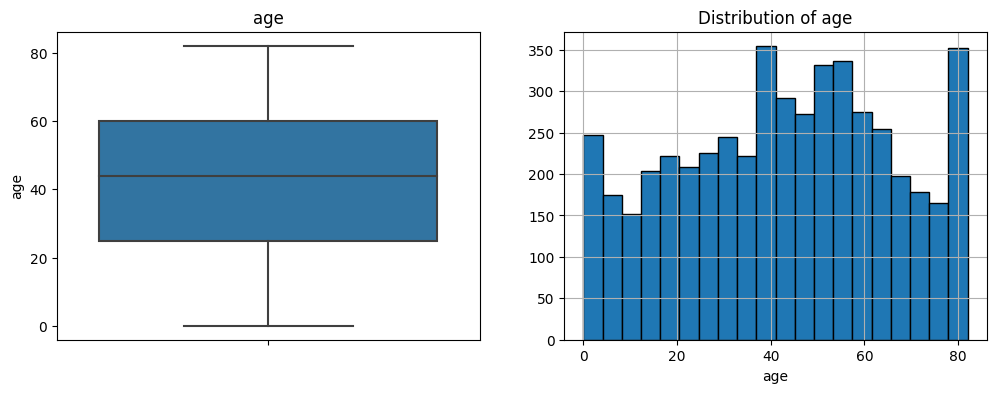

In [25]:
#Create two plots side by side
fig, axes = plt.subplots(ncols = 2, figsize = (12,4))
#Use Seaborn to produce a boxplot
sns.boxplot(y='age', data=df1, ax=axes[0])
axes[0].set_title("age");
#Create a histogram
df1['age'].hist(bins = 'auto', edgecolor = 'black', ax=axes[1])
axes[1].set_title('Distribution of age')
axes[1].set_xlabel('age')

**Interpretation**: The data is fairly evenly distributed, and there are no outliers.

**`avg_glucose_level`**

Text(0.5, 0, 'avg_glucose_level')

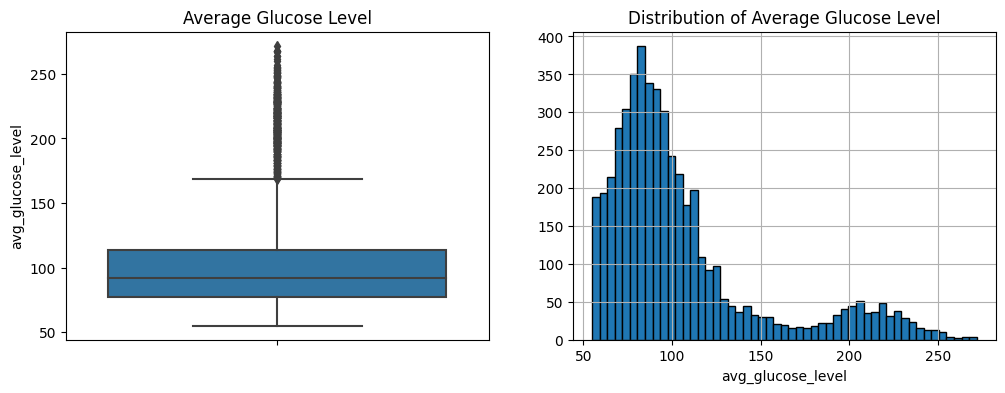

In [26]:
#Create two plots side by side
fig, axes = plt.subplots(ncols = 2, figsize = (12,4))
#Use Seaborn to produce a boxplot
sns.boxplot(y='avg_glucose_level', data=df1, ax=axes[0])
axes[0].set_title("Average Glucose Level");
#Create a histogram
df1['avg_glucose_level'].hist(bins = 'auto', edgecolor = 'black', ax=axes[1])
axes[1].set_title('Distribution of Average Glucose Level')
axes[1].set_xlabel('avg_glucose_level')

**Interpretation**: The data is skewed to the high side. There are many outliers on the high side.

**`bmi`**

Text(0.5, 0, 'bmi')

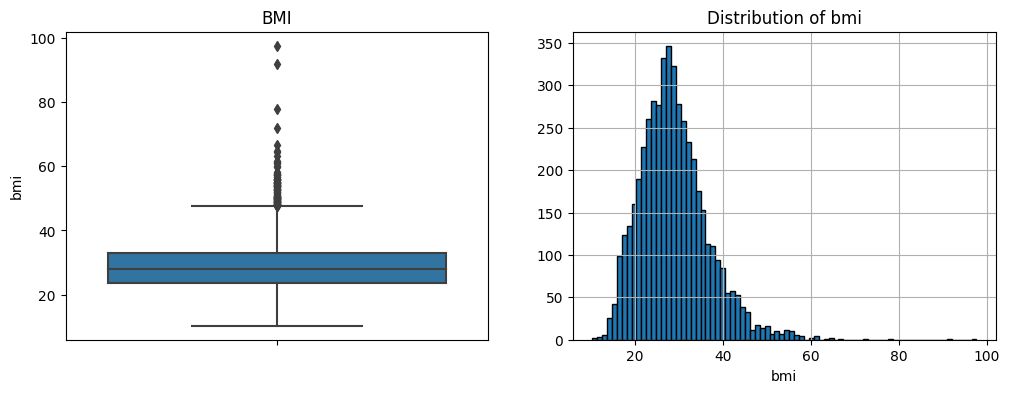

In [27]:
#Create two plots side by side
fig, axes = plt.subplots(ncols = 2, figsize = (12,4))
#Use Seaborn to produce a boxplot
sns.boxplot(y='bmi', data=df1, ax=axes[0])
axes[0].set_title("BMI");
#Create a histogram
df1['bmi'].hist(bins = 'auto', edgecolor = 'black', ax=axes[1])
axes[1].set_title('Distribution of bmi')
axes[1].set_xlabel('bmi')

**Interpretation**: The data is skewed to the high side and there are several outliers for values greater than ~50.

### **4.1.2 Categorical Features**

  - gender
  - hypertension
  - heart_disease
  - ever_married
  - work_type
  - Residence_type
  - smoking_status


**`gender`**

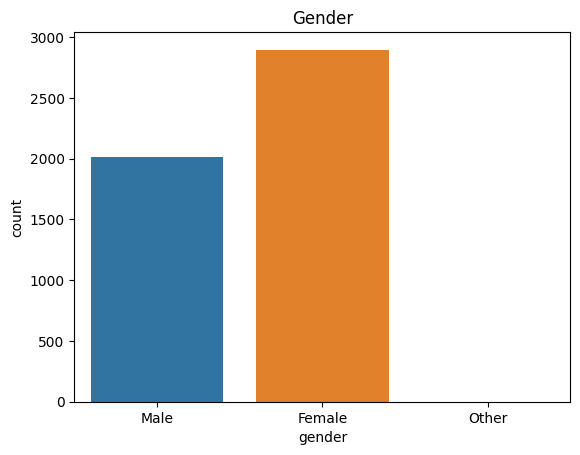

In [28]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='gender');
ax.set_title("Gender");

**Interpretation**: There are more Female data compared to male data.

**`hypertension`**

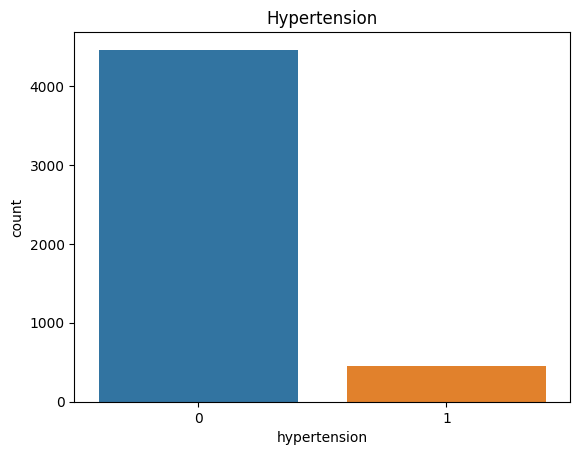

In [29]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='hypertension');
ax.set_title("Hypertension");

**Interpretation**: Only a small percentage of the data (~10%) shows hypertension = 1

**`heart_disease`**

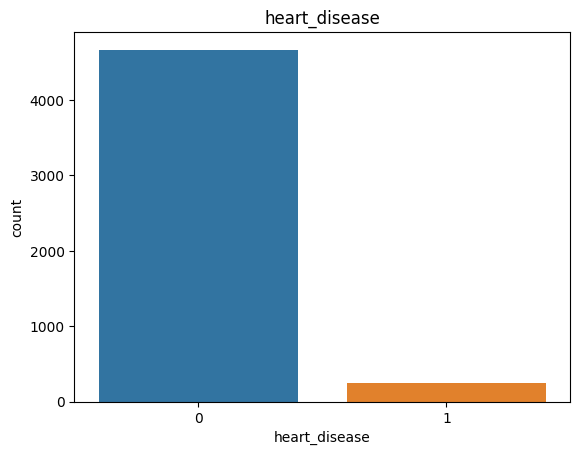

In [30]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='heart_disease');
ax.set_title("heart_disease");

**Interpretation**: Only a small percentage of the data shows heart_disease = 1.

**`ever_married`**

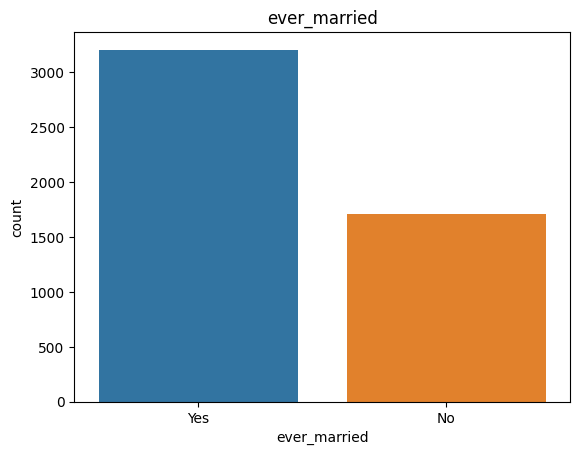

In [31]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='ever_married');
ax.set_title("ever_married");

**Interpretation**: About 2/3 of the data have been married and about 1/3 of the data have never been married.

**`work_type`**

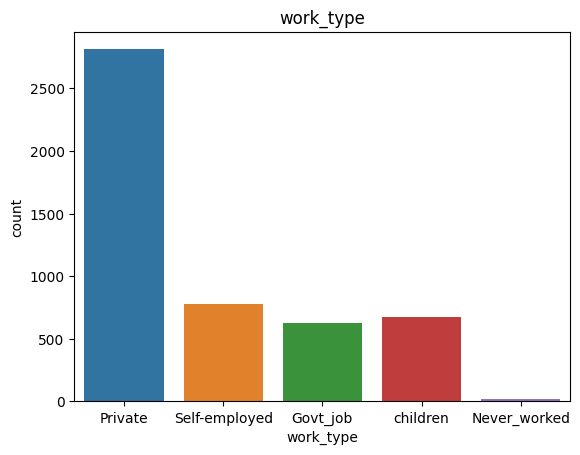

In [32]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='work_type');
ax.set_title("work_type");

**Interpretation**: Many of the patients work at private companies. A very small percentage of the patients who are not children have never worked.

**`Residence_type`**

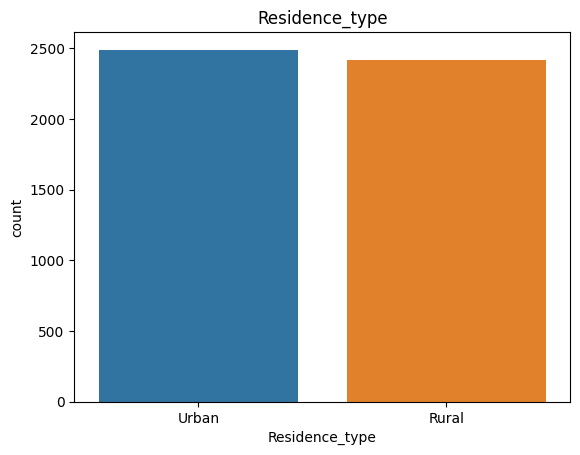

In [33]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='Residence_type');
ax.set_title("Residence_type");

**Interpretation**: There are about equal number of patients who live in urban areas and rural areas.

**`smoking_status`**

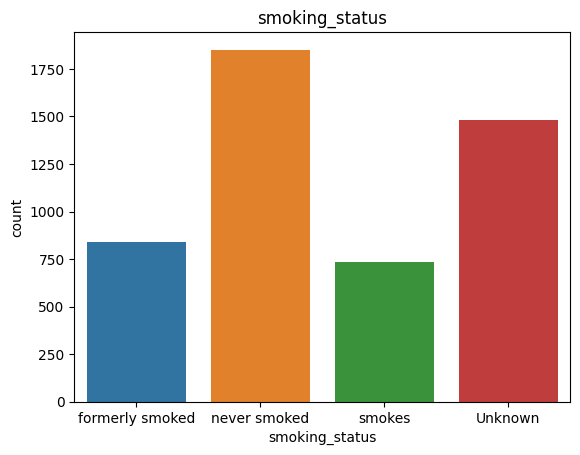

In [34]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='smoking_status');
ax.set_title("smoking_status");

**Interpretation**: The group of patients who have never smoked is the largest group in this dataset, but there are also some significant number of patients with unknown smoking status.

### **4.1.3 Target**

**`stroke`**

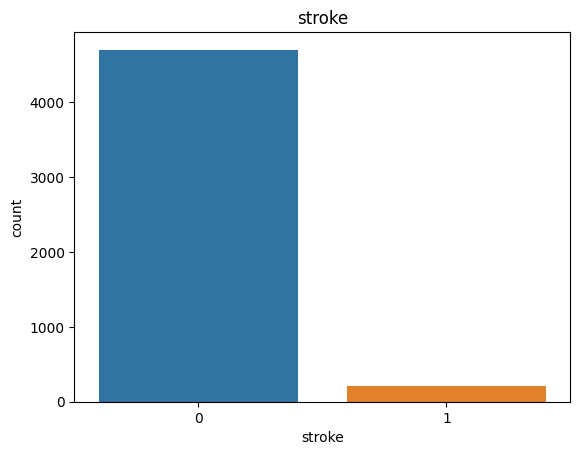

In [35]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='stroke');
ax.set_title("stroke");

**Interpretation**: Only small percentage of the data shows stroke = 1.

## **4.2 Multivariate Visualization**

### **4.2.1 Numerical Features** 


#### **Heatmap**

I will use heatmap to see the correlation of the numerical features against the target and other numerical features.

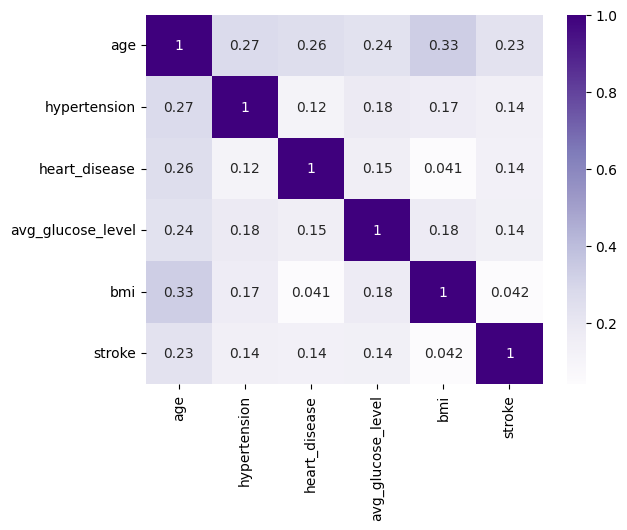

In [36]:
## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

corr = df1.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True);

**Interpretation**: 
- `Age` is relatively more correlated with all other features.
- While most features do not show significant correlation in this dataset, `Age` and `bmi` have a correlation coefficient of **0.33** which is considered relatively high within this dataset. 
- `Age` also has the highest correlation with the **target** `stroke`, with a correlation coefficient of **0.23**. In general, correlation coefficient of **0.23** is considered a low correlation. 

#### **Histogram**

**`age` and `stroke`**

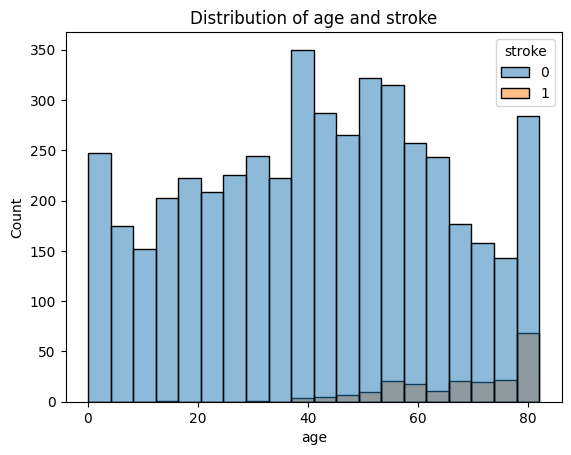

In [37]:
ax = sns.histplot(data=df1, x='age', edgecolor = 'black', hue='stroke')
ax.set_title("Distribution of age and stroke");

**Interpretation**: We can see that stroke is seen in people of older age, particularly ages above 40.

**`Average Glucose Level` and `stroke`**

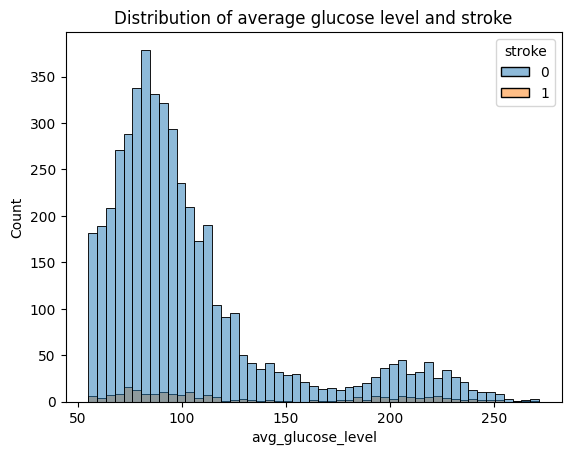

In [38]:
ax = sns.histplot(data=df1, x='avg_glucose_level', edgecolor = 'black', hue='stroke')
ax.set_title("Distribution of average glucose level and stroke");

**Interpretation**: Stroke is observed in people with low average glucose level as well as those with high average gluclose level. These two (`average glucose level` and `stroke`) are not very correlated with each other.

**`bmi` and `stroke`**

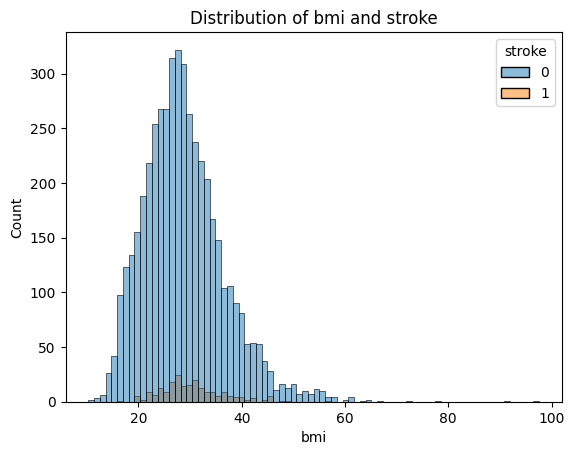

In [39]:
ax = sns.histplot(data=df1, x='bmi', edgecolor = 'black', hue='stroke')
ax.set_title("Distribution of bmi and stroke");

**Interpretation**: Majority of the data are in the range of bmi 20 to 40, and majority of stroke is also observed in this range. 

#### **Regplot**

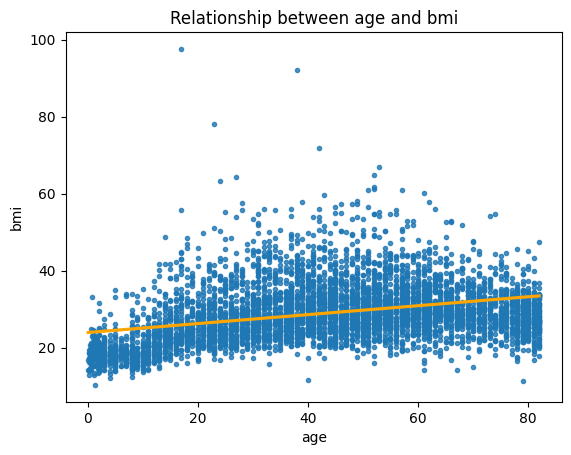

In [40]:
ax = sns.regplot(x='age', y='bmi', data= df1, line_kws = {'color' : 'orange'}, marker='.')
ax.set_title("Relationship between age and bmi");

**Interpretation**: The correlation is not very strong, but there is a slight positive correlation between `age` and `bmi`.

### **4.2.2 Categorical Features**

I will visualize each categorical feature **with respect to the target** for my multi-variate visualization.

- Categorical Features (includes 0 and 1):
  - gender
  - hypertension
  - heart_disease
  - ever_married
  - work_type
  - Residence_type
  - smoking_status

**`gender`**

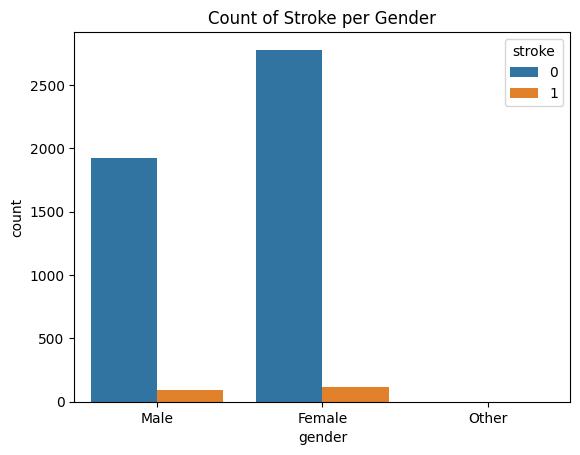

In [41]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='gender', hue='stroke');
ax.set_title("Count of Stroke per Gender");

**Interpretation**: Stroke is observed in both female and male. 

**`hypertension`**

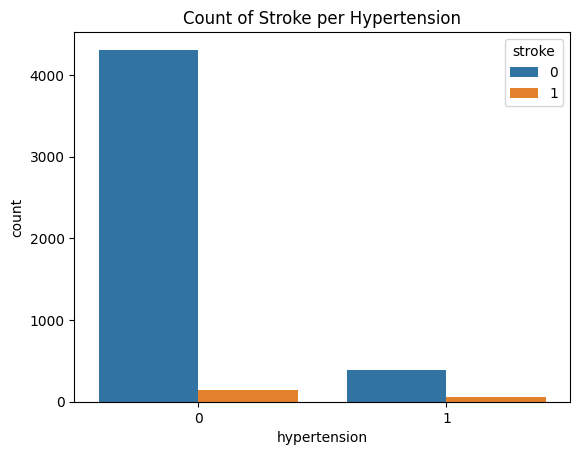

In [42]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='hypertension', hue='stroke');
ax.set_title("Count of Stroke per Hypertension");

**Interpretation**: Stroke is seen in both the groups of patients with hypertension and without hypertension. Considering the overall ratio of the data, the group of patients with hypertention has a higher percentage of patients who observed stroke.

**`heart_disease`**

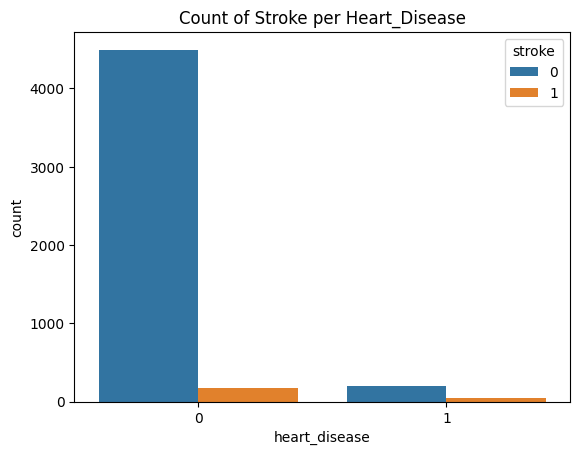

In [43]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='heart_disease', hue='stroke');
ax.set_title("Count of Stroke per Heart_Disease");

**Interpretation**:Stroke is seen in both the groups of patients with heat disease and those without. Considering the ratio, the group of patients with heart disease has a higher percentage of patients who observed stroke.

**`ever_married`**

In order to visualize the relationship between `ever_married` and `stroke`, I also plotted "`ever_married` and `age`", and "`age` and `stroke`" to visualize the relationship. 
- `ever_married` & `stroke`
-  `age` & `ever_married`
-  `age` & `stroke`


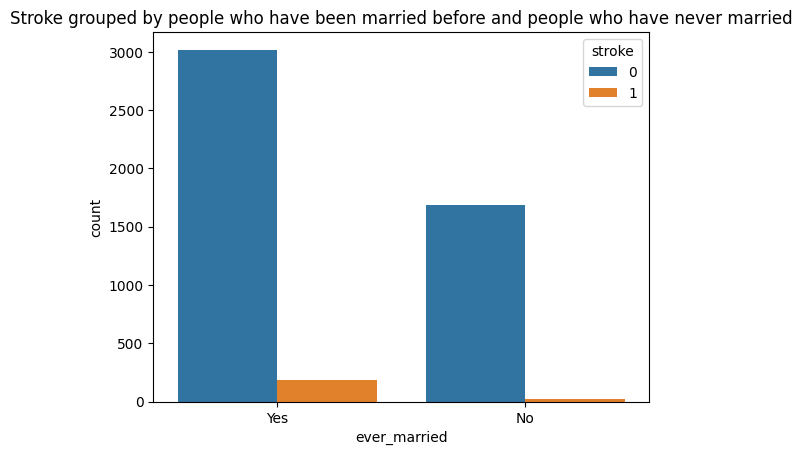

In [44]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='ever_married', hue='stroke');
ax.set_title("Stroke grouped by people who have been married before and people who have never married");

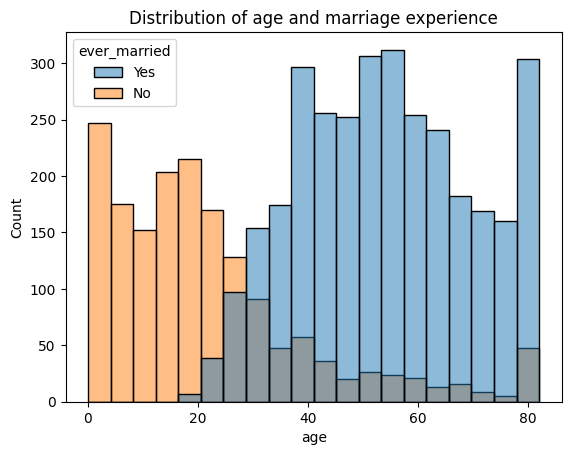

In [45]:
#Also plot the relationship between 'ever_married' and 'age' in order to analyze the 'ever_married' and 'stroke' plot.
ax = sns.histplot(data=df1, x='age', edgecolor = 'black', hue='ever_married');
ax.set_title("Distribution of age and marriage experience");

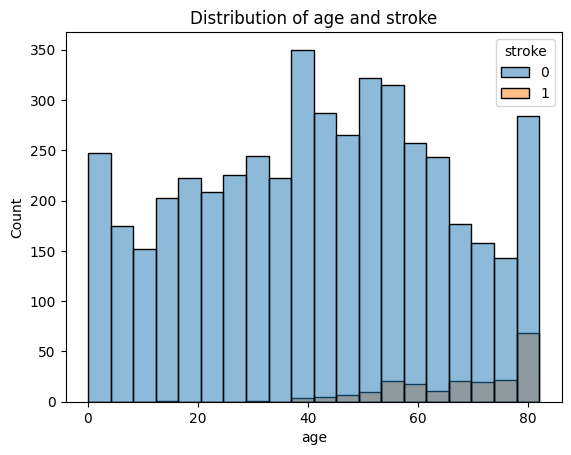

In [46]:
#Also plot the relationship between 'age' and 'stroke' in order to analyze the 'ever_married' and 'stroke' plot.
ax = sns.histplot(data=df1, x='age', edgecolor = 'black', hue='stroke');
ax.set_title("Distribution of age and stroke");

**Interpretation** of the above 3 plots combined: Among the patients who experienced stroke, there are more patients that have an experience of being married than those who have never married. This may also be explained from two different sets of data, where those who have never been married are in the younger age group (including children) ('age' vs 'ever_married') , and stroke is observed in the older age group more ('age' vs 'stroke').

**`work_type`**

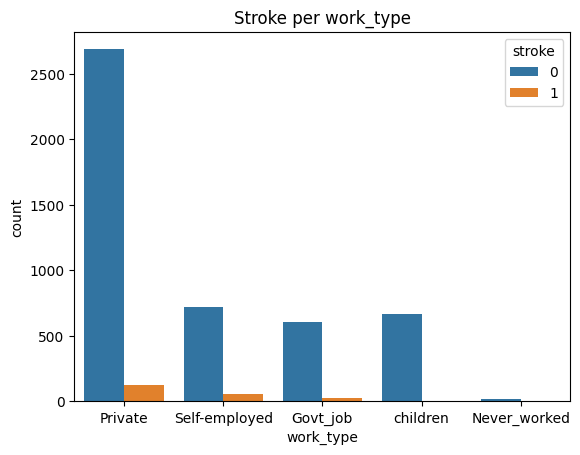

In [47]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='work_type', hue='stroke');
ax.set_title("Stroke per work_type");

**Interpretation**: Stroke is not common in children.

**`Residence_type`**

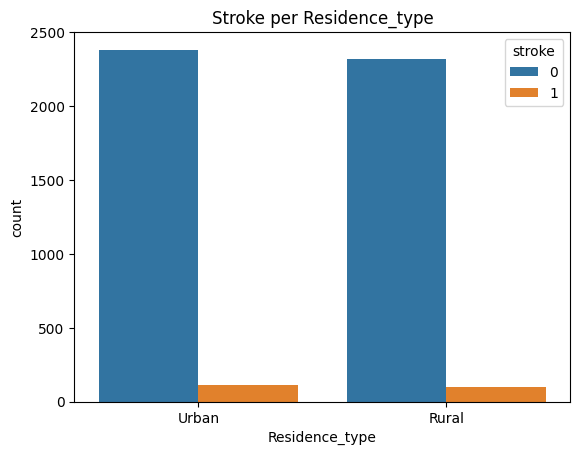

In [48]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='Residence_type', hue='stroke');
ax.set_title("Stroke per Residence_type");

**Interpretation**: There are about equal number of patients who experienced stroke in urban areas and rural areas. Residence type does not seem to affect whether a patient may experience stroke or not.

**`smoking_status`**

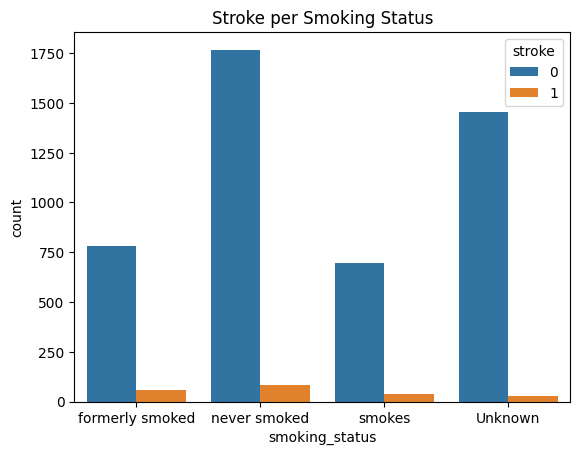

In [49]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='smoking_status', hue='stroke');
ax.set_title("Stroke per Smoking Status");

**Interpretation**: All group of patients experienced stroke, and there are also groups of patients with unknown smoking status, therefore, this data alone is not very helpful in predicting stroke.

## **4.3 Rows to be dropped based on EDA**

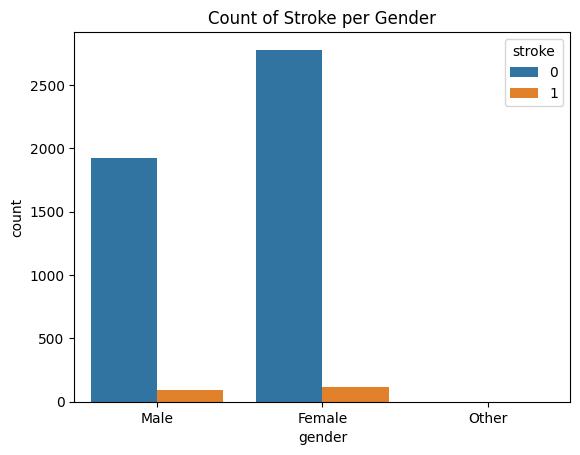

In [50]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='gender', hue='stroke');
ax.set_title("Count of Stroke per Gender");

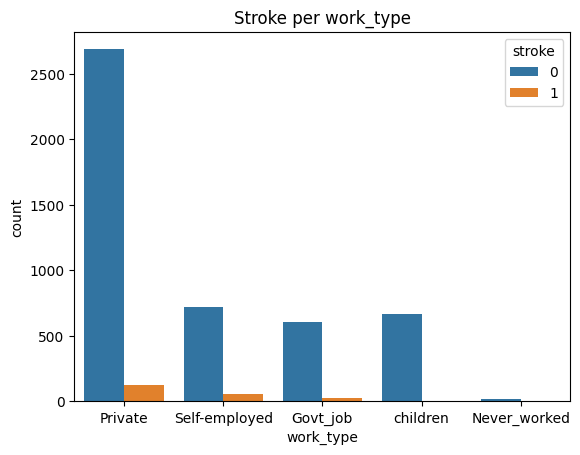

In [51]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='work_type', hue='stroke');
ax.set_title("Stroke per work_type");

**Based on the above plots, we can remove the row with value: "Other" in the `gender` column, and rows with value: "Never_worked" in the `work_type` column, as these are not frequent and act as noise in the modeling process.**

In [52]:
#Use filter to display the row that contains the value: "Other" in the gender column
df_filter1 = df1['gender'] == 'Other'
df1[df_filter1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [53]:
#Use filter to display the rows that contain the value: "Never_worked" in the work_type column
df_filter2 = df1['work_type'] == 'Never_worked'
df1[df_filter2]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
603,Male,23.0,0,0,No,Never_worked,Urban,125.26,18.7,never smoked,0
886,Female,19.0,0,0,No,Never_worked,Urban,86.96,25.8,never smoked,0
939,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0
959,Male,17.0,0,0,No,Never_worked,Urban,113.25,23.4,never smoked,0
1462,Male,17.0,0,0,No,Never_worked,Rural,61.01,32.5,Unknown,0
1789,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0
1922,Male,16.0,0,0,No,Never_worked,Urban,59.99,28.2,never smoked,0
2346,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0
2721,Female,17.0,0,0,No,Never_worked,Rural,88.57,31.1,never smoked,0


In [54]:
# Create a combined filter that filters rows that satisfy either filter condition 1 (gender is 'Other') or filter condition 2 (work_type is 'Never_worked')
df1_filter = df_filter1 | df_filter2

In [55]:
# Obtain the initial number of rows of df1 before applying the filter
df1.shape

(4909, 11)

In [56]:
# Drop the rows that match the filter condition by only keeping the rows that do not apply to the filter condition
df1 = df1[~df1_filter]

In [57]:
# Confirm that the rows that will act as noise have been filtered out
df1.shape

(4886, 11)

Display the plots again to double-check that the rows that will act as noise in machine learning modeling have been removed:

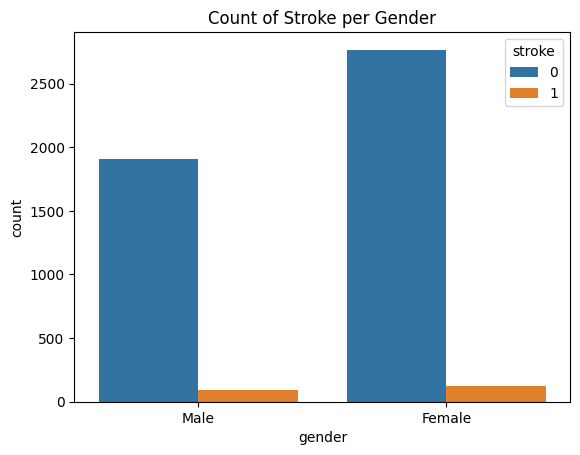

In [58]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='gender', hue='stroke');
ax.set_title("Count of Stroke per Gender");

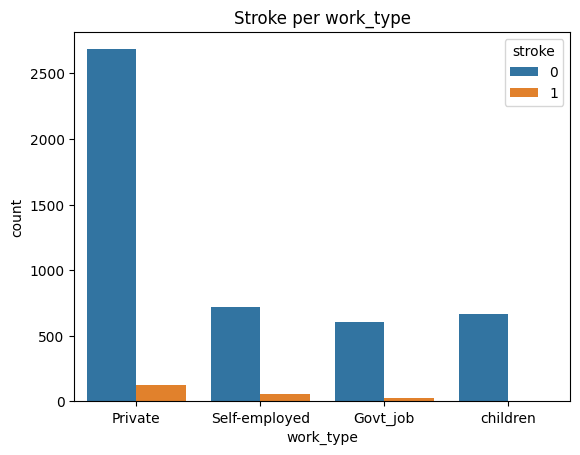

In [59]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='work_type', hue='stroke');
ax.set_title("Stroke per work_type");

# **5. Explanatory Data Analysis**

**Project 2 - Part 3(Core) Step#2**: 

>Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).
>
> These plots should be so simple, and so easy to read, that a 6th grader could understand them in less than 10 seconds without asking questions. They don't need to be fancy, they need to CLEARLY show an interesting trend or correlation between features in your data.

**Visualization #1**

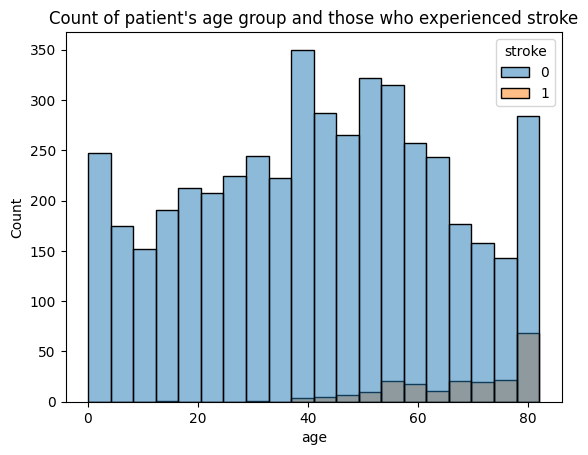

In [60]:
ax = sns.histplot(data=df1, x='age', edgecolor = 'black', hue='stroke')
ax.set_title("Count of patient's age group and those who experienced stroke");

**Interpretation**: We can see that stroke is seen in people of older age. We start to see strokes in patients of ages 40 and above and almost none for those who are below the age of 40. The data shows that the number of patients who experience stroke increases significantly at around the age of 80.

**Visualization #2**

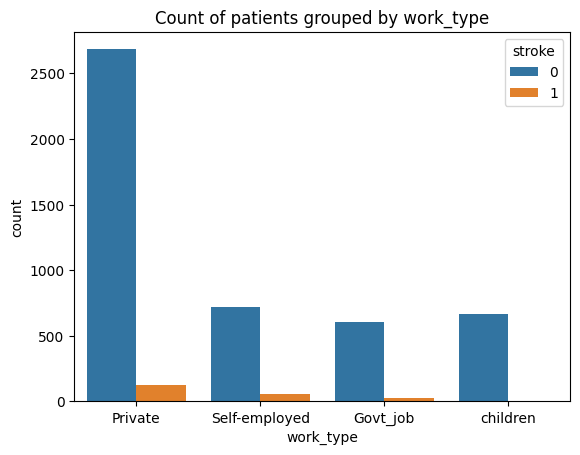

In [61]:
ax = sns.countplot(data=df1,x='work_type', hue='stroke');
ax.set_title("Count of patients grouped by work_type");

**Interpretation**: Stroke is not common in children.

# **-----Project 2 - Part 4 (Core)-----**

# **6. Pre-Processing for Machine Learning**

## **6.1 Import Libraries**

In [62]:
#Import Libraries

# Preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Train-Test-Split 
from sklearn.model_selection import train_test_split

## **6.2 Prepare a clean copy of data**

In [63]:
#Create a copy of the cleaned up dataframe for modeling
df_ml = df1.copy()

In [64]:
df_ml.shape

(4886, 11)

In [65]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4886 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4886 non-null   object 
 1   age                4886 non-null   float64
 2   hypertension       4886 non-null   int64  
 3   heart_disease      4886 non-null   int64  
 4   ever_married       4886 non-null   object 
 5   work_type          4886 non-null   object 
 6   Residence_type     4886 non-null   object 
 7   avg_glucose_level  4886 non-null   float64
 8   bmi                4886 non-null   float64
 9   smoking_status     4886 non-null   object 
 10  stroke             4886 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 458.1+ KB


## **6.3 Arrange into Features (X) and target (y)**

In [66]:
# Arrange Data into a Features Matrix and Target Vector.
y = df_ml['stroke']
X = df_ml.drop(columns = 'stroke')

## **6.4 Train-Test-Split**

In [67]:
#Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## **6.5 Column Selector**

In [68]:
df_ml.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

There are no missing values in this dataset, therefore, we will not use any imputer.

### 6.5.1 Numerical Columns

In [69]:
# Use StandardScaler to scale the numerical values
scaler = StandardScaler()

# Column Selector
num_selector = make_column_selector(dtype_include='number')

# Tuple
numeric_tuple = (scaler, num_selector)

### 6.5.2 Nominal Columns

In [70]:
# Use one-hot-encoder on the nominal columns
ohe = OneHotEncoder(sparse=False, handle_unknown = 'ignore')

# Column Selector
nominal_cols = ['gender', 'ever_married', 'work_type','Residence_type', 'smoking_status']

# Tuple
nominal_tuple = (ohe, nominal_cols)

### 6.5.3 Ordinal Columns

There are no ordinal columns in this dataset.

## **6.6 Create a Preprocessor using Column Transformer**

In [71]:
##Instantiate a Column Transformer
preprocessor = make_column_transformer(numeric_tuple, nominal_tuple, remainder='passthrough', verbose_feature_names_out= False)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6555751090>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type', 'smoking_status'])],
                  verbose_feature_names_out=False)

# **7. Modeling**

In [135]:
#Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

# Classification Metrics
from sklearn.metrics import (ConfusionMatrixDisplay, RocCurveDisplay, classification_report, accuracy_score, f1_score, precision_score, recall_score)

## **7.1 Logistic Regression Model**

### **7.1.1 Default Logistic Regression Model**

In [73]:
# Make an instance of the model with default parameters
lr = LogisticRegression(random_state=42)
def_lr_pipe = make_pipeline(preprocessor, lr)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
def_lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6555751090>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(random_state=42))])

### **7.1.2 Tuned Logistic Regression Model**

In [ ]:
#Display the parameters of this model for tuning
def_lr_pipe.get_params()

In [75]:
# Instantiate a model for tuning the hyperparameters
lr = LogisticRegression(solver='liblinear', random_state=42)
lr_pipe = make_pipeline(preprocessor, lr)
# Create a parameter grid of hyperparameters that will be tuned
param_grid = {'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
              'logisticregression__penalty': ['l1', 'l2']}

In [76]:
# Use GridSearchCV to tune the model
lr_grid_search = GridSearchCV(lr_pipe, param_grid)

In [77]:
# Fit on the training data
lr_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f6555751090>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['gender',
                                                                          'ever_married',
                                                                          'work_type',
                                                                          'Residence_type',
                                                                          'smoking_status'])],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
                         'logisticregression__penalty': ['l1', 'l2']})

In [78]:
# Output the best value of the parameters specified in the param_grid
lr_grid_search.best_params_

{'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}

The best parameters found by GridSearchCV were:
- C: 10
- penalty: 'l1'

Next, we will create a model using the best parameters found by GridSearchCV.

In [79]:
#retrieve the best version of the model
tuned_lr = lr_grid_search.best_estimator_

#refit the model on the whole training set
tuned_lr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f655505d9c0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(C=10, penalty='l1', random_state=42,
                                    solver='liblinear'))])

### **7.1.3 Evaluation of Tuned Logistic Regression Model**

Source: Coding Dojo Course

In [80]:
## Create a function to display the classification metrics of a model
def classification_metrics(model, X_test, y_test, label='Test Data', 
                             figsize=(15,5), normalize='true',
                             cmap='Greens', thresh=.5): 
                             
    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_proba = model.predict_proba(X_test)
    y_pred = [1 if x[1] > thresh else 0 for x in y_proba]
    
    ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred, 
                normalize=normalize, cmap=cmap,              
                ax=axes[0])    
    
    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3518
           1       1.00      0.01      0.01       146

    accuracy                           0.96      3664
   macro avg       0.98      0.50      0.50      3664
weighted avg       0.96      0.96      0.94      3664



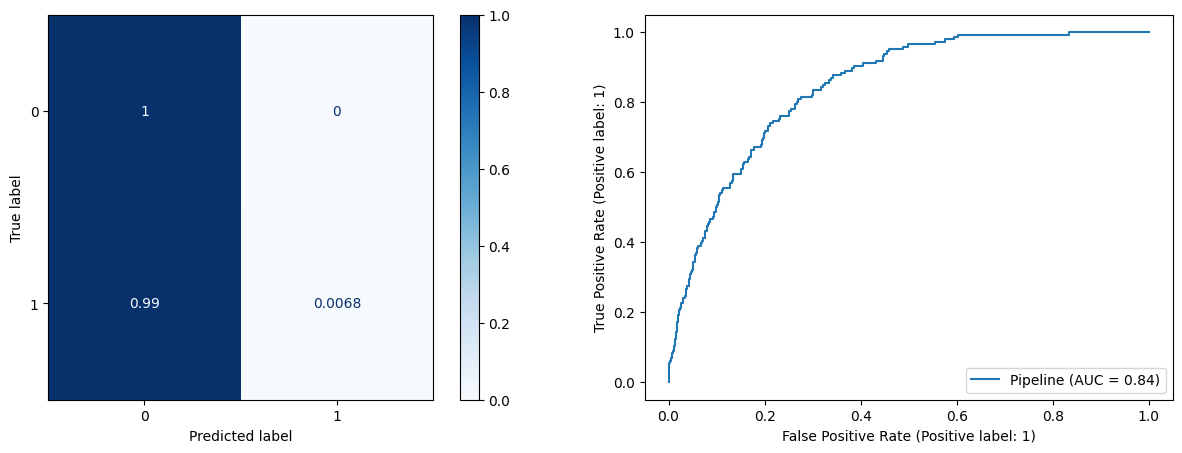

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1159
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1222
   macro avg       0.47      0.50      0.49      1222
weighted avg       0.90      0.95      0.92      1222



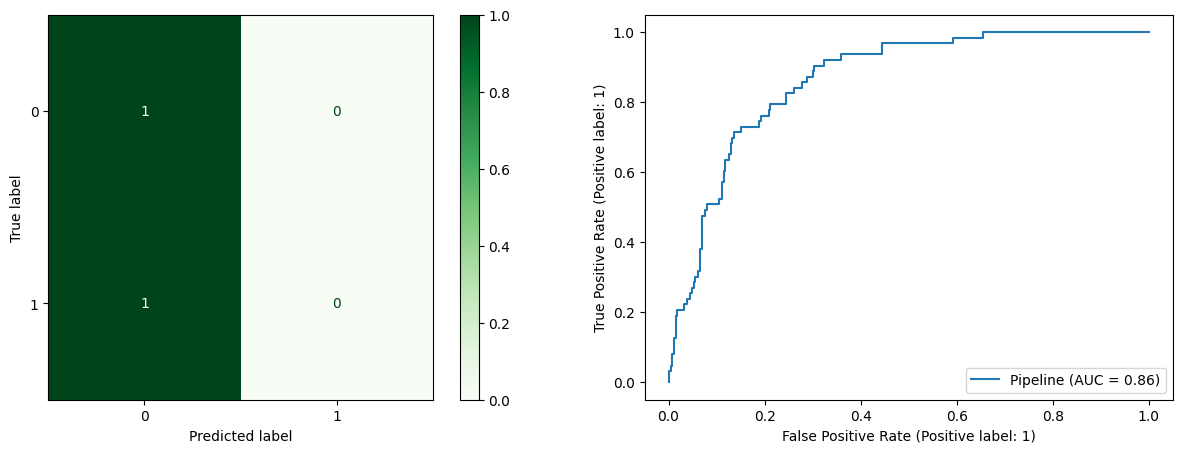

In [81]:
# Call the custom function to display metrics for training set
classification_metrics(tuned_lr, X_train,y_train, thresh=.5,
                         cmap='Blues', label='Training Data')
# Call the custom function to display metrics for testing set
classification_metrics(tuned_lr, X_test,y_test, thresh=.5,
                         cmap='Greens',label='Test Data')

## **7.2 K-Nearest Neighbors (KNN)**

### **7.2.1 Default KNN model**

In [82]:
# Instantiate a KNN Classifier model with default parameters
knn = KNeighborsClassifier()
def_knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model on training data
def_knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6555751090>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

### **7.2.2 Tuned KNN model**

In [ ]:
# Display the parameters of the knn pipeline
def_knn_pipe.get_params()

In [84]:
# Set up a paremeter grid for tuning the knn model with GridSearchCV
pipe_param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [85]:
# Use GridSearchCV to find the best parameter
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe_gs = GridSearchCV(knn_pipe, pipe_param_grid)
# Fit on the training data
knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 8, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}


In [86]:
# Create a model with the best parameters
tuned_knn = knn_pipe_gs.best_estimator_
# Fit on the training data
tuned_knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6553037910>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=8, p=1))])

### **7.2.3 Evaludation of Tuned KNN model**

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3518
           1       0.00      0.00      0.00       146

    accuracy                           0.96      3664
   macro avg       0.48      0.50      0.49      3664
weighted avg       0.92      0.96      0.94      3664



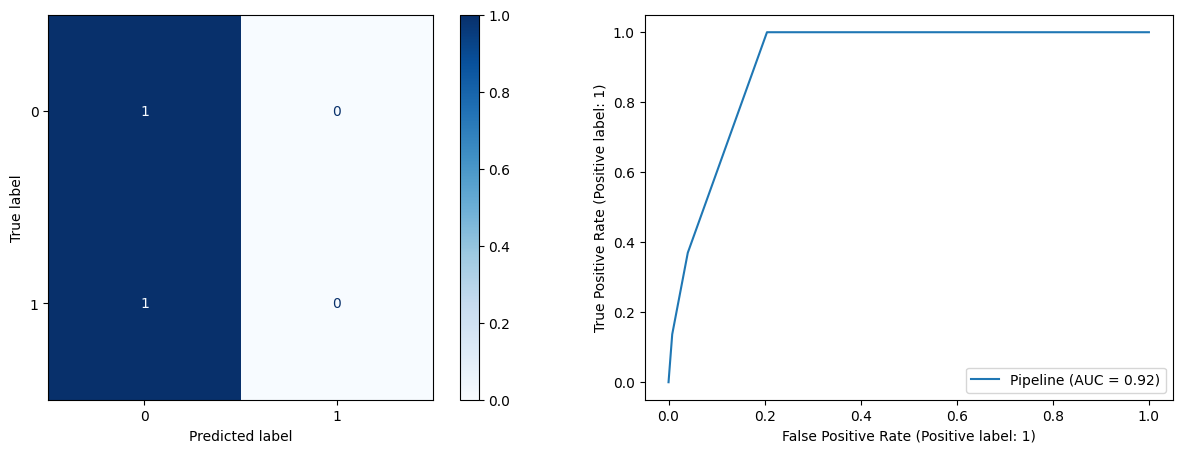

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1159
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1222
   macro avg       0.47      0.50      0.49      1222
weighted avg       0.90      0.95      0.92      1222



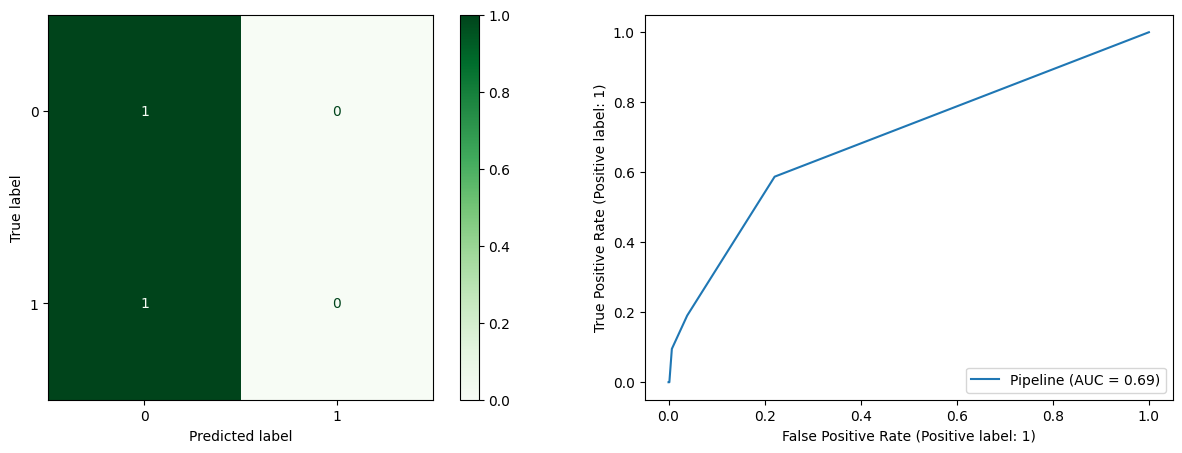

In [87]:
# Call the custom function to display metrics for training set
classification_metrics(tuned_knn, X_train,y_train, thresh=.5,
                         cmap='Blues', label='Training Data')
# Call the custom function to display metrics for testing set
classification_metrics(tuned_knn, X_test,y_test, thresh=.5,
                         cmap='Greens',label='Test Data')

## **7.3 Random Forest Model**

### **7.3.1 Default Random Forest Model**

In [88]:
# Make an instance of the model
rf = RandomForestClassifier(random_state=42)
# Create pipeline
def_rf_pipe = make_pipeline(preprocessor, rf)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
def_rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6555751090>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

### **7.3.2 Tuned Random Forest Model**

In [ ]:
# Display the parameters that can be tuned for Random Forest
def_rf_pipe.get_params()

In [90]:
#Create a parameter grid
rf_param_grid = {'randomforestclassifier__max_depth': range(1,10),
              'randomforestclassifier__n_estimators': [1,5,10]}

In [146]:
#Use GridSearchCV to find the optimum value of the above hyperparameters
rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe_gs = GridSearchCV(rf_pipe, rf_param_grid)
rf_pipe_gs.fit(X_train, y_train)
print('Best Random Forest Parameters:')
print(rf_pipe_gs.best_params_)
rf_best_pipe = rf_pipe_gs.best_estimator_

Best Random Forest Parameters:
{'randomforestclassifier__max_depth': 1, 'randomforestclassifier__n_estimators': 1}


In [92]:
rf_best_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f65511f7370>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=1, n_estimators=1,
                                        random_state=42))])

In [93]:
print(f'Accuracy of best Random Forest model is: {rf_best_pipe.score(X_test, y_test)}')

Accuracy of best Random Forest model is: 0.9484451718494271


### **7.3.3 Evaluation of Tuned Random Forest Model**

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3518
           1       0.00      0.00      0.00       146

    accuracy                           0.96      3664
   macro avg       0.48      0.50      0.49      3664
weighted avg       0.92      0.96      0.94      3664



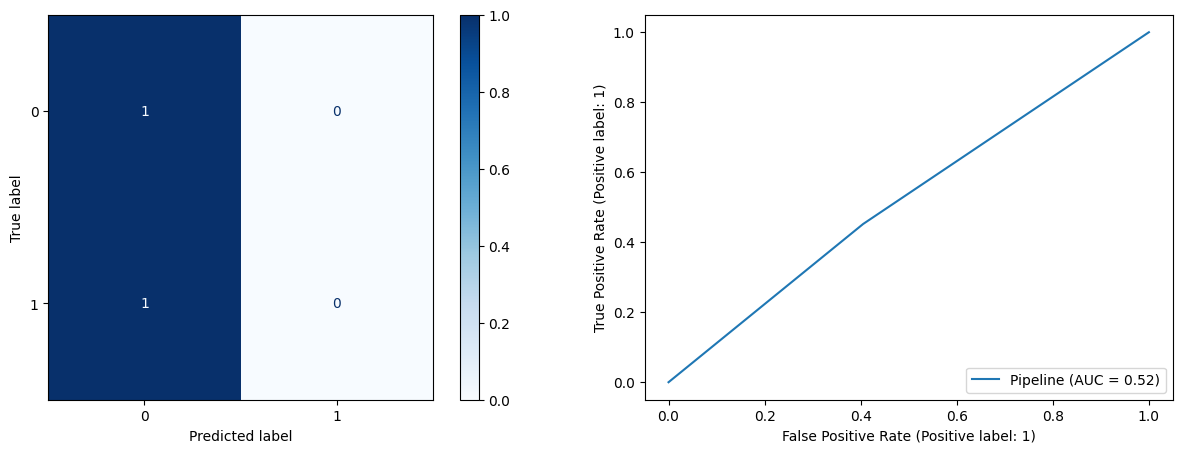

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1159
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1222
   macro avg       0.47      0.50      0.49      1222
weighted avg       0.90      0.95      0.92      1222



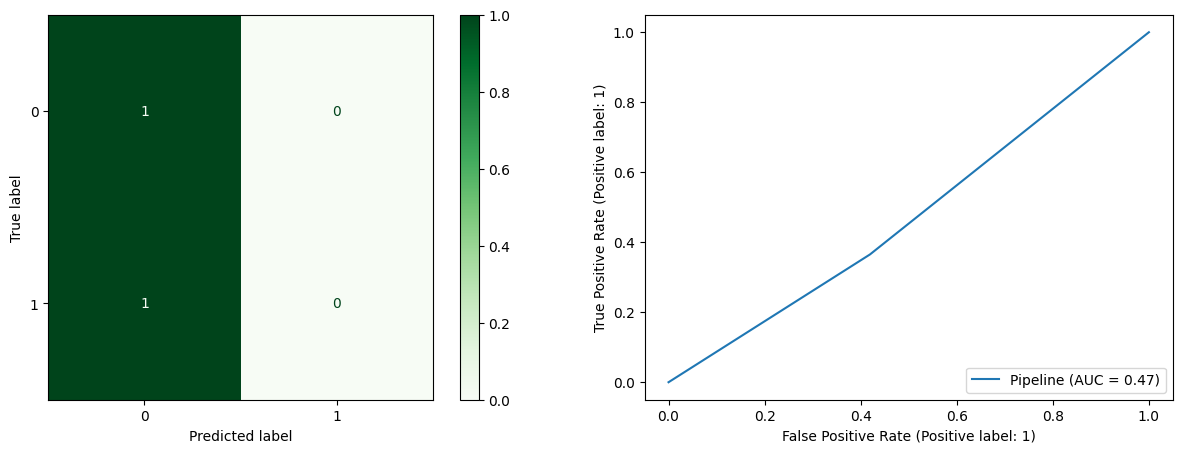

In [94]:
# Call the custom function to display metrics for training set
classification_metrics(rf_best_pipe, X_train,y_train, thresh=.5,
                         cmap='Blues', label='Training Data')
# Call the custom function to display metrics for testing set
classification_metrics(rf_best_pipe, X_test,y_test, thresh=.5,
                         cmap='Greens',label='Test Data')

## **7.4 PCA**

Use Pricipal Component Analysis to transform the features into Principal Components to reduce the dimension.

In [95]:
#Import library
from sklearn.decomposition import PCA

In [96]:
# Instantiate PCA and retain 95% of the variance.
pca = PCA(n_components=.95)

In [97]:
# Create a transformer pipeline
transformer = make_pipeline(preprocessor, pca)

In [98]:
# Use the transformer pipeline to apply scaler & pca to the data
#transformer.fit_transform(X_train)

### **7.4.1 PCA + LogReg**

In [99]:
##Put the PCA Pipeline (transformer) in another pipeline with the KNN model
#Create a modeling pipeline
lr_pca_pipe = make_pipeline(transformer, lr)
lr_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f6555751090>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   ['gender',
                                                                    'ever_married',
                                                                    'work_type',
                                                                    'Residence_type',
                                                                    'smoking_status'])],
                                                    verbose_feature_names_out=False)),
                                 ('pca', PCA(n_components=0.95))])),
                ('logisticregression',
                 LogisticRegression(random_state=42, solver='liblinear'))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3518
           1       0.00      0.00      0.00       146

    accuracy                           0.96      3664
   macro avg       0.48      0.50      0.49      3664
weighted avg       0.92      0.96      0.94      3664



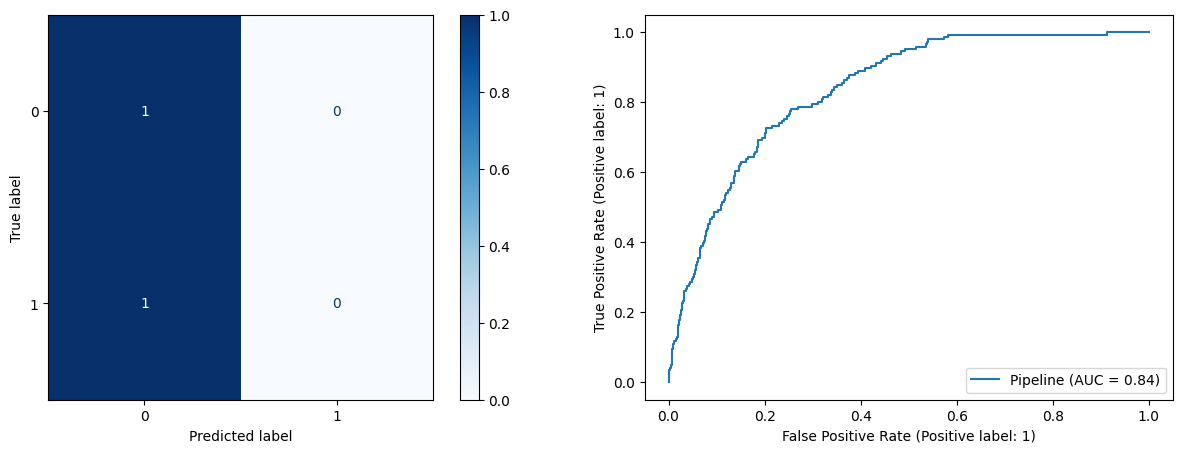

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1159
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1222
   macro avg       0.47      0.50      0.49      1222
weighted avg       0.90      0.95      0.92      1222



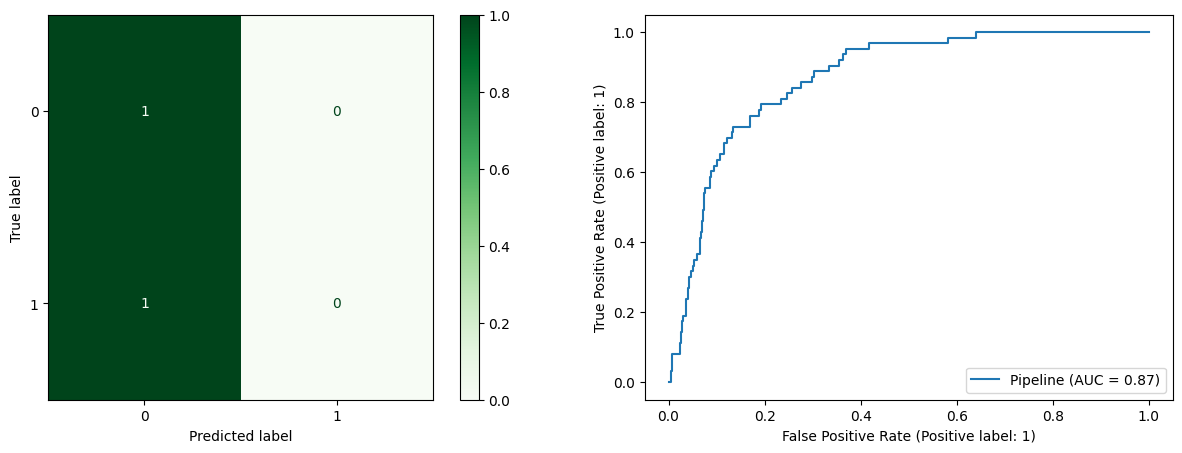

In [100]:
# Call the custom function to display metrics for training set
classification_metrics(lr_pca_pipe, X_train,y_train, thresh=.5,
                         cmap='Blues', label='Training Data')
# Call the custom function to display metrics for testing set
classification_metrics(lr_pca_pipe, X_test,y_test, thresh=.5,
                         cmap='Greens',label='Test Data')

### **7.4.2 PCA + KNN** 

In [101]:
##Put the PCA Pipeline (transformer) in another pipeline with the KNN model
#Create a modeling pipeline
knn_pca_pipe = make_pipeline(transformer, knn)
knn_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f6555751090>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   ['gender',
                                                                    'ever_married',
                                                                    'work_type',
                                                                    'Residence_type',
                                                                    'smoking_status'])],
                                                    verbose_feature_names_out=False)),
                                 ('pca', PCA(n_components=0.95))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3518
           1       0.50      0.03      0.06       146

    accuracy                           0.96      3664
   macro avg       0.73      0.52      0.52      3664
weighted avg       0.94      0.96      0.94      3664



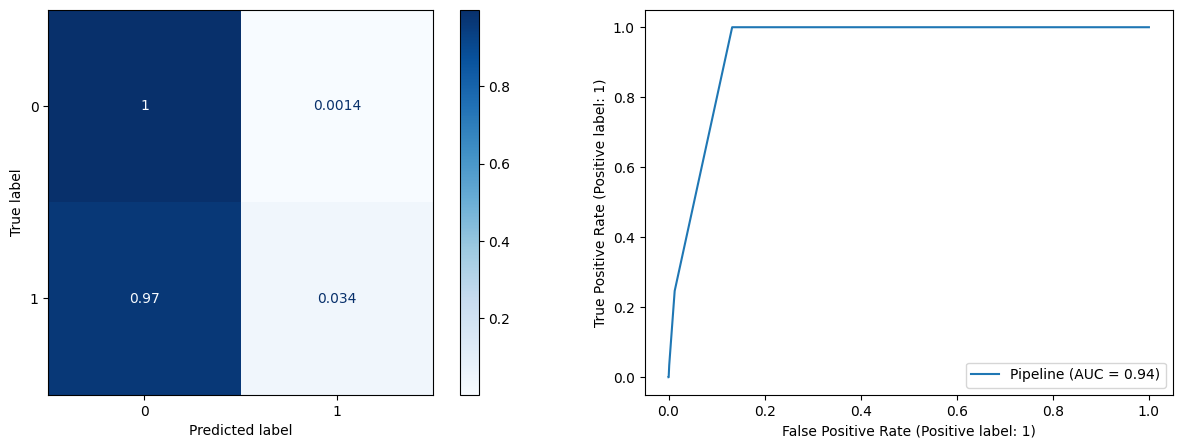

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1159
           1       0.50      0.03      0.06        63

    accuracy                           0.95      1222
   macro avg       0.72      0.52      0.52      1222
weighted avg       0.93      0.95      0.93      1222



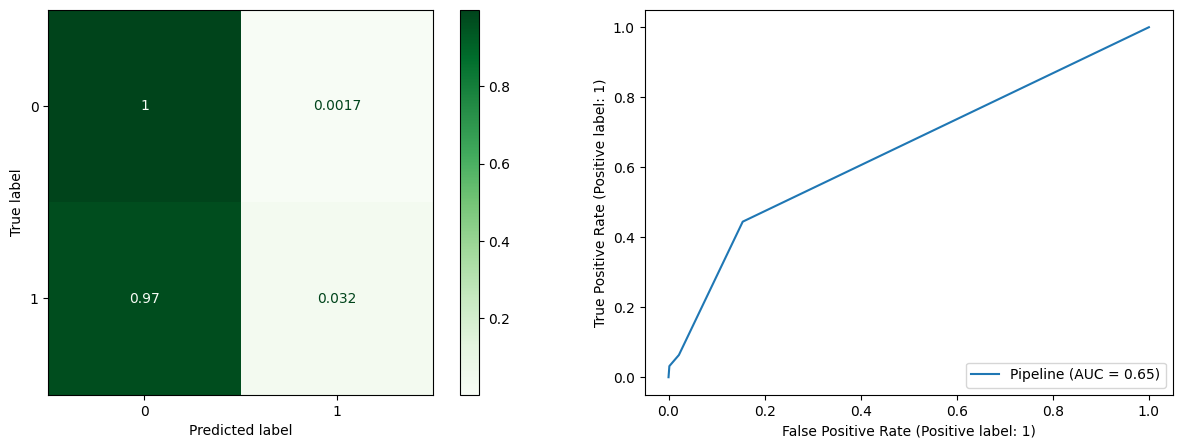

In [102]:
# Call the custom function to display metrics for training set
classification_metrics(knn_pca_pipe, X_train,y_train, thresh=.5,
                         cmap='Blues', label='Training Data')
# Call the custom function to display metrics for testing set
classification_metrics(knn_pca_pipe, X_test,y_test, thresh=.5,
                         cmap='Greens',label='Test Data')

### **7.4.3. PCA + Random Forest**

In [103]:
##Put the PCA Pipeline (transformer) in another pipeline with the KNN model
#Create a modeling pipeline
rf_pca_pipe = make_pipeline(transformer, rf)
rf_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f6555751090>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   ['gender',
                                                                    'ever_married',
                                                                    'work_type',
                                                                    'Residence_type',
                                                                    'smoking_status'])],
                                                    verbose_feature_names_out=False)),
                                 ('pca', PCA(n_components=0.95))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3518
           1       1.00      1.00      1.00       146

    accuracy                           1.00      3664
   macro avg       1.00      1.00      1.00      3664
weighted avg       1.00      1.00      1.00      3664



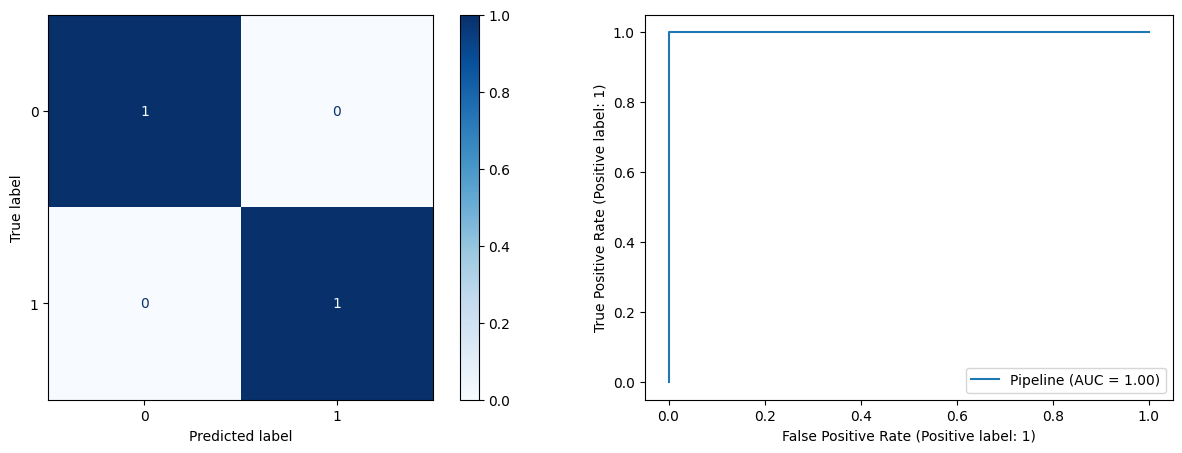

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1159
           1       0.50      0.02      0.03        63

    accuracy                           0.95      1222
   macro avg       0.72      0.51      0.50      1222
weighted avg       0.93      0.95      0.92      1222



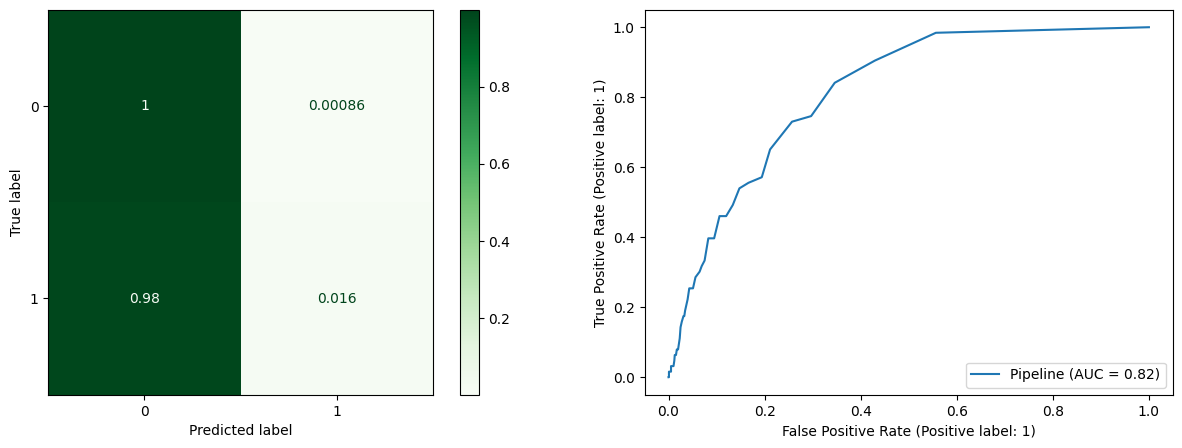

In [104]:
# Call the custom function to display metrics for training set
classification_metrics(rf_pca_pipe, X_train,y_train, thresh=.5,
                         cmap='Blues', label='Training Data')
# Call the custom function to display metrics for testing set
classification_metrics(rf_pca_pipe, X_test,y_test, thresh=.5,
                         cmap='Greens',label='Test Data')

# **8. Comparing Models**

## **8.1 Predicted values for each model**

In [105]:
#Predicted values of the training set and test set for each model

#Tuned Logistic Regression
lr_opt_train_pred = tuned_lr.predict(X_train)
lr_opt_test_pred = tuned_lr.predict(X_test)

#Tuned KNN model
knn_opt_train_pred = tuned_knn.predict(X_train)
knn_opt_test_pred = tuned_knn.predict(X_test)

#Tuned Random Forest model
rf_opt_train_pred = rf_best_pipe.predict(X_train)
rf_opt_test_pred = rf_best_pipe.predict(X_test)

#PCA + Logistic Regression model
lr_pca_train_pred = lr_pca_pipe.predict(X_train)
lr_pca_test_pred = lr_pca_pipe.predict(X_test)

#PCA + KNN model
knn_pca_train_pred = knn_pca_pipe.predict(X_train)
knn_pca_test_pred = knn_pca_pipe.predict(X_test)

#PCA + Random Forest model
rf_pca_train_pred = rf_pca_pipe.predict(X_train)
rf_pca_test_pred = rf_pca_pipe.predict(X_test)

## **8.2 Accuracy of each model**

In [130]:
# Calculate the accuracy of test data for each model
lr_opt_accuracy = accuracy_score(y_test, lr_opt_test_pred)
knn_opt_accuracy = accuracy_score(y_test, knn_opt_test_pred)
rf_opt_accuracy = accuracy_score(y_test, rf_opt_test_pred)
lr_pca_accuracy = accuracy_score(y_test, lr_pca_test_pred)
knn_pca_accuracy = accuracy_score(y_test, knn_pca_test_pred)
rf_pca_accuracy = accuracy_score(y_test, rf_pca_test_pred)

## **8.3 F1 Score of each model**

In [141]:
# Calculate the F1 score of test data for each model
lr_opt_f1 = f1_score(y_test, lr_opt_test_pred)
knn_opt_f1 = f1_score(y_test, knn_opt_test_pred)
rf_opt_f1 = f1_score(y_test, rf_opt_test_pred)
lr_pca_f1 = f1_score(y_test, lr_pca_test_pred)
knn_pca_f1 = f1_score(y_test, knn_pca_test_pred)
rf_pca_f1 = f1_score(y_test, rf_pca_test_pred)

## **8.4 Precision of each model**

In [142]:
# Calculate the precision of test data for each model
lr_opt_precision = precision_score(y_test, lr_opt_test_pred)
knn_opt_precision = precision_score(y_test, knn_opt_test_pred)
rf_opt_precision = precision_score(y_test, rf_opt_test_pred)
lr_pca_precision = precision_score(y_test, lr_pca_test_pred)
knn_pca_precision = precision_score(y_test, knn_pca_test_pred)
rf_pca_precision = precision_score(y_test, rf_pca_test_pred)

## **8.5 Recall of each model**

In [143]:
# Calculate the recall of test data for each model
lr_opt_recall = recall_score(y_test, lr_opt_test_pred)
knn_opt_recall = recall_score(y_test, knn_opt_test_pred)
rf_opt_recall = recall_score(y_test, rf_opt_test_pred)
lr_pca_recall = recall_score(y_test, lr_pca_test_pred)
knn_pca_recall = recall_score(y_test, knn_pca_test_pred)
rf_pca_recall = recall_score(y_test, rf_pca_test_pred)

In [145]:
#Metrics on Test Data Only


Tuned_LR = [lr_opt_accuracy,lr_opt_f1, lr_opt_precision, lr_opt_recall]
Tuned_KNN = [knn_opt_accuracy, knn_opt_f1, knn_opt_precision, knn_opt_recall]
Tuned_RF = [rf_opt_accuracy, rf_opt_f1, rf_opt_precision, rf_opt_recall]
PCA_LR = [lr_pca_accuracy, lr_pca_f1, lr_pca_precision, lr_pca_recall]
PCA_KNN = [knn_pca_accuracy, knn_pca_f1, knn_pca_precision, knn_pca_recall]
PCA_RF = [rf_pca_accuracy, rf_pca_f1, rf_pca_precision, rf_pca_recall]


data = [Tuned_LR, Tuned_KNN, Tuned_RF, PCA_LR, PCA_KNN, PCA_RF]
Test_Data_Metrics_df = pd.DataFrame(data, columns= ['Accuracy', 'F1-Score', 'Precision', 'Recall'] )


TestData_Metrics_df = Test_Data_Metrics_df.rename(index={0:'Tuned Logistic Regression', 1: 
                                                         'Tuned KNN', 2:'Tuned Random Forest', 3: 'Logistic Regression with PCA', 
                                                         4: 'KNN with PCA', 5: 'Random Forest with PCA'})
TestData_Metrics_df

,Accuracy,F1-Score,Precision,Recall
Tuned Logistic Regression,0.948445,0.000000,0.0,0.000000
Tuned KNN,0.948445,0.000000,0.0,0.000000
Tuned Random Forest,0.948445,0.000000,0.0,0.000000
Logistic Regression with PCA,0.948445,0.000000,0.0,0.000000
KNN with PCA,0.948445,0.059701,0.5,0.031746
Random Forest with PCA,0.948445,0.030769,0.5,0.015873


## **8.3 Test Data Comparison**

Compare the Confusion Matrix and Classification Report values on the **Test Data** for all 6 models:

Tuned Logistic Regression
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1159
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1222
   macro avg       0.47      0.50      0.49      1222
weighted avg       0.90      0.95      0.92      1222



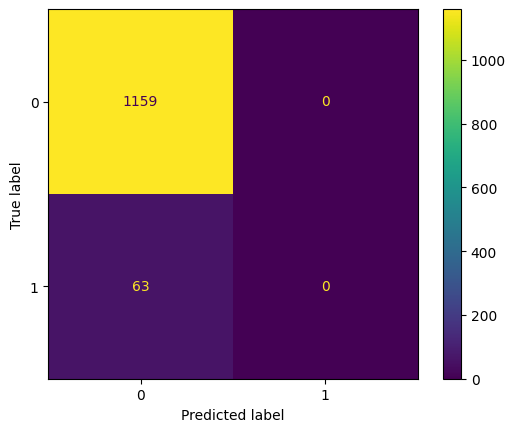

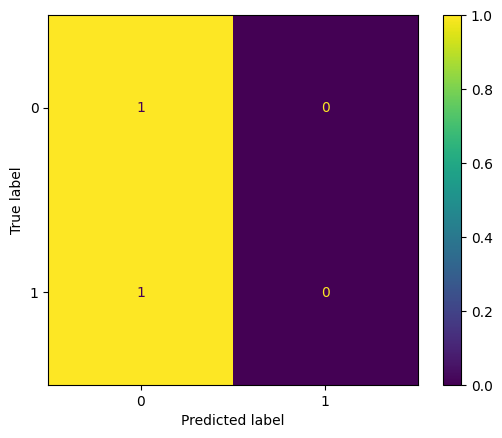

In [108]:
print("Tuned Logistic Regression")
print(classification_report(y_test, lr_opt_test_pred))
ConfusionMatrixDisplay.from_predictions(y_test, lr_opt_test_pred);
ConfusionMatrixDisplay.from_predictions(y_test, lr_opt_test_pred, normalize = 'true');

Tuned KNN
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1159
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1222
   macro avg       0.47      0.50      0.49      1222
weighted avg       0.90      0.95      0.92      1222



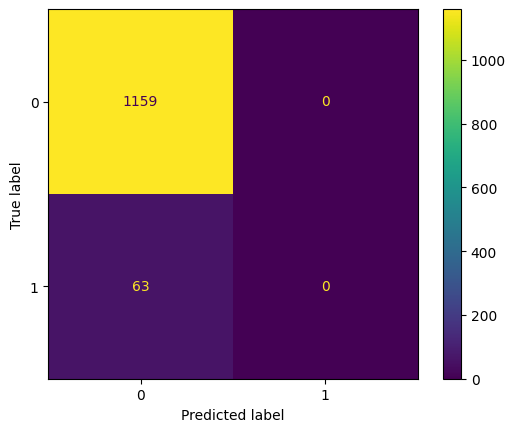

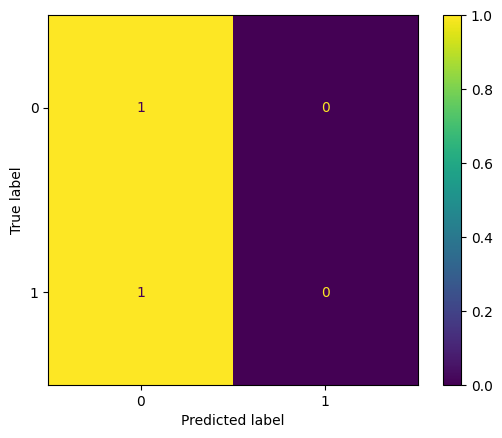

In [109]:
print("Tuned KNN")
print(classification_report(y_test, knn_opt_test_pred))
ConfusionMatrixDisplay.from_predictions(y_test, knn_opt_test_pred);
ConfusionMatrixDisplay.from_predictions(y_test, knn_opt_test_pred, normalize = 'true');

Tuned Random Forest
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1159
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1222
   macro avg       0.47      0.50      0.49      1222
weighted avg       0.90      0.95      0.92      1222



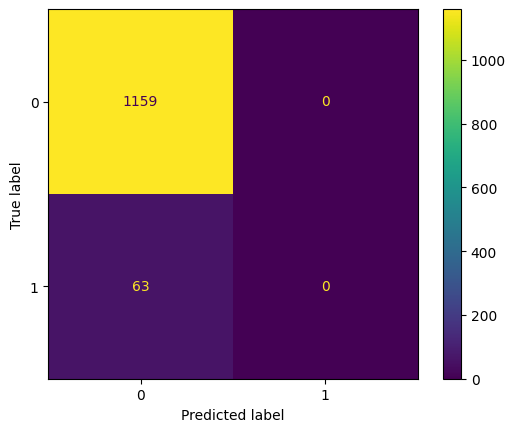

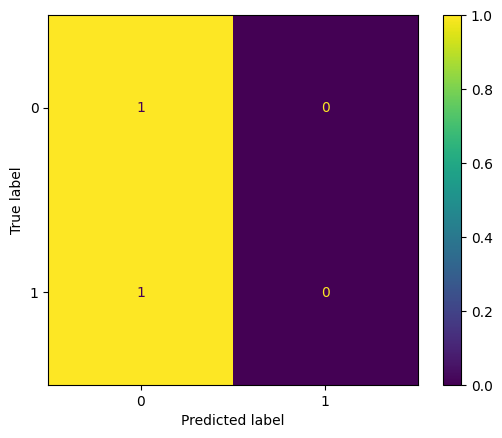

In [110]:
print("Tuned Random Forest")
print(classification_report(y_test, rf_opt_test_pred))
ConfusionMatrixDisplay.from_predictions(y_test, rf_opt_test_pred);
ConfusionMatrixDisplay.from_predictions(y_test, rf_opt_test_pred, normalize = 'true');

# **9 Feature Engineering**

Apply Feature Engineering to the features to explore if it provides better fit with the models.

## **9.1 Modifying features**

In [111]:
# Create a copy of the cleaned dataset
df_ml_fe=df_ml.copy()

#### Column: **Age** 
  * Round all ages to the nearest 10s

In [112]:
# Round all ages to the nearest 10s
df_ml_fe['age'] = df_ml_fe['age'].round(-1)
df_ml_fe.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,70.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,50.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,80.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,80.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


#### Column: **avg_glucose_level**
 * Categorize into 3 values based on the numerical values: normal, moderate, high

In [113]:
# Categorize avg_glucose_level into 3 categories: normal, moderate, high
df_ml_fe['avg_glucose_level'] = df_ml_fe['avg_glucose_level'].apply(lambda x: 'normal' if x < 100 else ('moderate'
 if x < 120 else 'high'))
df_ml_fe.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,70.0,0,1,Yes,Private,Urban,high,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,moderate,32.5,never smoked,1
3,Female,50.0,0,0,Yes,Private,Urban,high,34.4,smokes,1
4,Female,80.0,1,0,Yes,Self-employed,Rural,high,24.0,never smoked,1
5,Male,80.0,0,0,Yes,Private,Urban,high,29.0,formerly smoked,1


In [114]:
# Check that the conversion was successful
df_ml_fe['avg_glucose_level'].value_counts()

normal      3016
high        1047
moderate     823
Name: avg_glucose_level, dtype: int64

In [115]:
df_ml_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4886 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4886 non-null   object 
 1   age                4886 non-null   float64
 2   hypertension       4886 non-null   int64  
 3   heart_disease      4886 non-null   int64  
 4   ever_married       4886 non-null   object 
 5   work_type          4886 non-null   object 
 6   Residence_type     4886 non-null   object 
 7   avg_glucose_level  4886 non-null   object 
 8   bmi                4886 non-null   float64
 9   smoking_status     4886 non-null   object 
 10  stroke             4886 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 458.1+ KB


## **9.2 Arrange into Features (X) and target (y)**

In [116]:
# Arrange Data into a Features Matrix and Target Vector.
y_fe = df_ml_fe['stroke']
X_fe = df_ml_fe.drop(columns = 'stroke')

## **9.3 Train-Test-Split**

In [117]:
#Train-Test-Split
X_fe_train, X_fe_test, y_fe_train, y_fe_test = train_test_split(X_fe, y_fe, random_state=42)

## **9.4 Preprocessing**

9.4.1 Numerical Columns

In [118]:
# Use StandardScaler to scale the numerical values
scaler = StandardScaler()

# Column Selector
num_selector = make_column_selector(dtype_include='number')

# Tuple
numeric_tuple = (scaler, num_selector)

9.4.2 Nominal Columns

In [119]:
# Use one-hot-encoder on the nominal columns
ohe = OneHotEncoder(sparse=False, handle_unknown = 'ignore')

# Column Selector
fe_nominal_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Tuple
fe_nominal_tuple = (ohe, fe_nominal_cols)

9.4.3 Ordinal Column

In [120]:
# Ordered Category Lists
gl_list = ['Normal','Moderate','High']

#Ordinal encoder
ord = OrdinalEncoder(categories=gl_list,handle_unknown='use_encoded_value',unknown_value = -1)
#Scaler
scaler2=StandardScaler()

# Pipeline
ord_pipeline = make_pipeline(ord, scaler2)
# Selector
ordinal_cols = ['avg_glucose_level']
# Tuple
ordinal_tuple = (ord_pipeline, ordinal_cols)

Preprocessor using column transformer

In [121]:
##Instantiate a Column Transformer
preprocessor2 = make_column_transformer(numeric_tuple, fe_nominal_tuple, ordinal_tuple, remainder='passthrough', verbose_feature_names_out= False)
preprocessor2

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6553359660>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type', 'smoking_status']),
                                ('pipeline',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=['Normal',
                                                                             'Moderate',
                                                                             'High'],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['avg_glucose_level'])],
                  verbose_feature_names_out=False)

ValueError: ignored

## **9.5 Modeling**

Let's apply our two best models to the engineered feature:
1. Tuned Logistic Regression
2. Tuned Random Forest

**1. Tuned Logistic Regression**

In [123]:
# Instantiate a model for tuning the hyperparameters
lr = LogisticRegression(solver='liblinear', random_state=42)
lr_pipe2 = make_pipeline(preprocessor2, lr)
# Create a parameter grid of hyperparameters that will be tuned
param_grid = {'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
              'logisticregression__penalty': ['l1', 'l2']}

In [124]:
# Use GridSearchCV to tune the model
lr_grid_search2 = GridSearchCV(lr_pipe2, param_grid)

In [125]:
lr_grid_search2

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f6553359660>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['gender',
                                                                          'ever_married',
                                                                          'work_type',
                                                                          'Residence_...
                                                                                                                     'Moderate',
                                                                                                                     'High'],
                                                                                                         handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['avg_glucose_level'])],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
                         'logisticregression__penalty': ['l1', 'l2']})

In [127]:
# Fit on the training data
lr_grid_search2.fit(X_fe_train, y_fe_train)

ValueError: ignored

In [ ]:
# Output the best value of the parameters specified in the param_grid
lr_grid_search2.best_params_

In [ ]:
#retrieve the best version of the model
tuned_lr2 = lr_grid_search2.best_estimator_

#refit the model on the whole training set
tuned_lr2.fit(X_fe_train, y_fe_train)

**2. Tuned Random Forest**

In [ ]:
#Use GridSearchCV to find the optimum value of the above hyperparameters
rf_pipe2 = make_pipeline(preprocessor2, rf)
rf_pipe_gs2 = GridSearchCV(rf_pipe2, rf_param_grid)
rf_pipe_gs2.fit(X_fe_train, y_fe_train)
print('Best Random Forest Parameters:')
print(rf_pipe_gs2.best_params_)
rf_best_pipe2 = rf_pipe_gs2.best_estimator_

In [ ]:
rf_best_pipe2.fit(X_fe_train,y_fe_train)

In [ ]:
print(f'Accuracy of best Random Forest model is: {rf_best_pipe2.score(X_fe_test, y_fe_test)}')

# **10. Analysis & Recommendation**

# **11. Limitation**